# Test des fonctions pour la détection de signature

Ce notebook permet de voir comment utiliser les fonctions pour la détection de signature.

Pour d'avantage d'informations sur une fonction, exécuter la commande `help(nom_fonction)`.

> <font color = 'green'> Choisir le kernel **pdf**

In [6]:
# Variables globales & chemins absolus
# ------------------------------------
#----- Chemin du répertoire de travail
PATH = "C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/Python"

#----- Chemin des scripts python .py
PATH_UTILS =  PATH + "/utilities"

#----- Chemin des données
PATH_DATA = PATH + "/data/LEA/papier" #LEA
#PATH_DATA = PATH + "/data/EAI/papier" #EAI

In [7]:
# Librairies nécessaires
# ------------------------------------
import os
os.chdir(PATH_UTILS) #on se place dans le répertoire des fonctions

import preprocessing as pp
import template as tp
import detectSignature as ds

In [1]:
# Extraire une page d'un PDF et la sauvegarder au format PDF ou JPG
# ------------------------------------
"""
import numpy as np
from PIL import Image

pdf = pp.load_pdf(pdf_name="template_qcfqr_type1.pdf",pdf_path=PATH)
im = np.array(pdf[0]) #on extrait la page 0. 
pp.show_image(im)
pil_im = Image.fromarray(im)
pil_im.save("template_qcfqr_type1.pdf")
#pil_im.save("template_qcfqr_type1.jpg")
"""

'\nimport numpy as np\nfrom PIL import Image\n\npdf = pp.load_pdf(pdf_name="template_qcfqr_type1.pdf",pdf_path=PATH)\nim = np.array(pdf[0]) #on extrait la page 0. \npp.show_image(im)\npil_im = Image.fromarray(im)\npil_im.save("template_qcfqr_type1.pdf")\n#pil_im.save("template_qcfqr_type1.jpg")\n'

## Module preprocessing

Cette partie sert uniquement à illustrer les différentes fonctions du module `preprocessing`. \
Les fonctions du module `preprocessing` sont utilisées ensuite dans le module `template` et `detectSignature`.

In [ ]:
#help(pp)

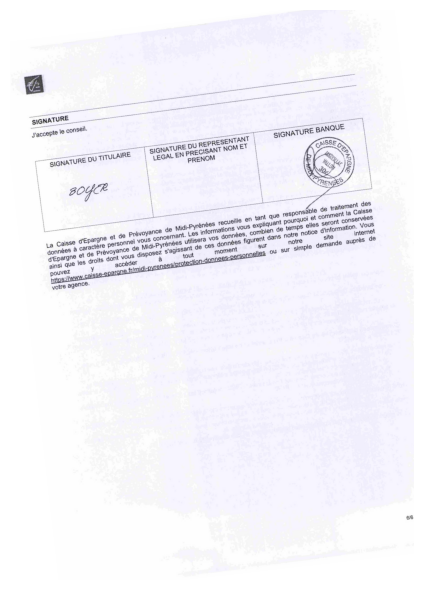

In [4]:
# Chargement du pdf
# ------------------------------------
pdf = pp.load_pdf(pdf_name="008120289_rotated_30.pdf",pdf_path=PATH_DATA)

# Extraction d'une page du pdf 
# ------------------------------------
im = pp.find_page_with_number(pdf=pdf,numero_page=-1)

# Affichage de la page
# ------------------------------------
pp.show_image(img=im)

Image avant toute modification :


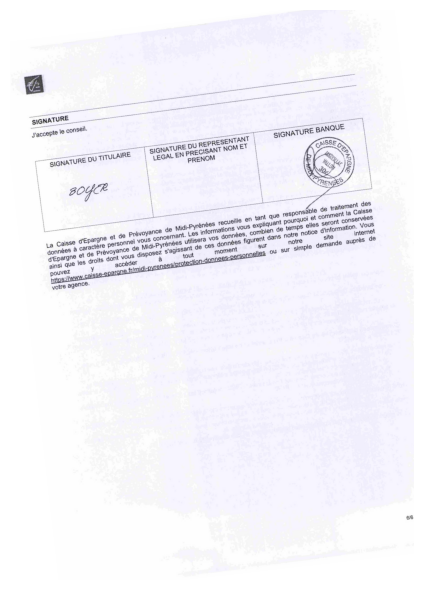

angle OpenCV:  -7.9963002674811845
Image après rotation OpenCV :


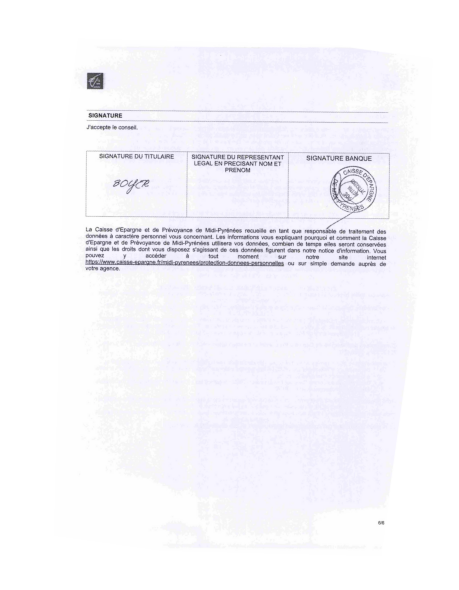

angle Tesseract:  0


In [5]:
# Rotation de la page
# ------------------------------------
print("Image avant toute modification :")
pp.show_image(im)

#----- 1) Rotation de l'image avec get_angle_openCV()

mean_angle = pp.get_angle_openCV(im)
print("angle OpenCV: ", mean_angle)

if abs(mean_angle) > 0: #rotation de l'image si l'angle est != 0 
    im = pp.rotate_im(im,mean_angle)
    print("Image après rotation OpenCV :")
    pp.show_image(im)

#----- 2) Rotation avec get_angle_tesseract() pour 
#         différencier entre les angles 0° et 180°

angle = pp.get_angle_tesseract(im)
print("angle Tesseract: ", angle)

if abs(angle) > 0: #rotation de l'image si l'angle est != 0 
    im = pp.rotate_im(im,angle)
    print("Image après rotation Tesseract :")
    pp.show_image(im)

Image après débruitage et seuillage :


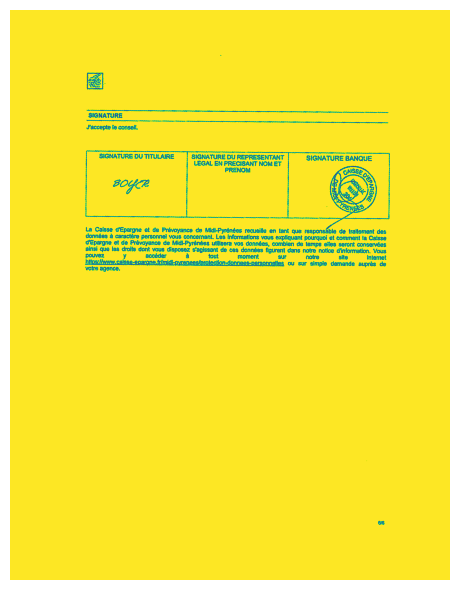

In [6]:
# Débruitage et seuillage des images
# ------------------------------------
im_thresh = pp.denoise_image(im)
print("Image après débruitage et seuillage :")
pp.show_image(im_thresh)


## Module template

> ATTENTION, l'image template doit être "parfaite" c'est-à-dire que tous les mots clés 
keyWords_template doivent être présents et lisibles par Tesseract dans la page du 
pdf template. Sinon, une erreur peut se produire. 
Dans ce cas, une solution est de changer l'image d'entrée ou de modifier la liste
des mots clés. 

In [ ]:
#help(tp)

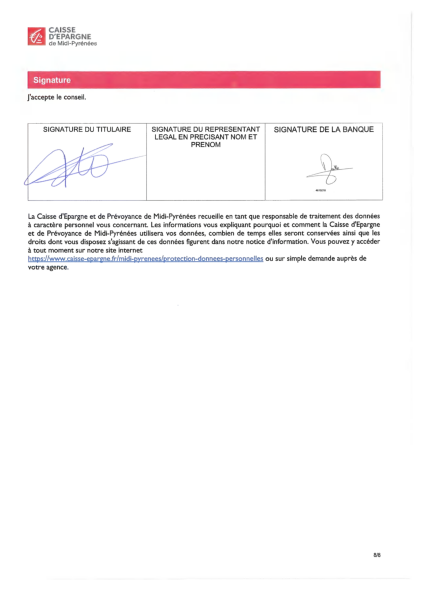

In [10]:
# Chargement du pdf template
# ------------------------------------
pdf_template = pp.load_pdf(pdf_name="006961477.pdf",pdf_path=PATH_DATA) #LEA 
#pdf_template = pp.load_pdf(pdf_name="006892465.pdf",pdf_path=PATH + "/data/EAI/numerique") #EAI
#pdf_template = pp.load_pdf(pdf_name="006736008_BS_type1_sig_pap.pdf",pdf_path=PATH + "/Alteryx/Workflow_BS/input_data") #BS

# Extraction d'une page du pdf 
# ------------------------------------
im_template = pp.find_page_with_number(pdf=pdf_template,numero_page=-1)
template_shape = im_template.shape
template_text = tp.read_page(im_template)

# Affichage de la page template
# ------------------------------------
pp.show_image(img=im_template)


Veuillez dessiner le template.
Template créé avec succès.
Template sélectionné :


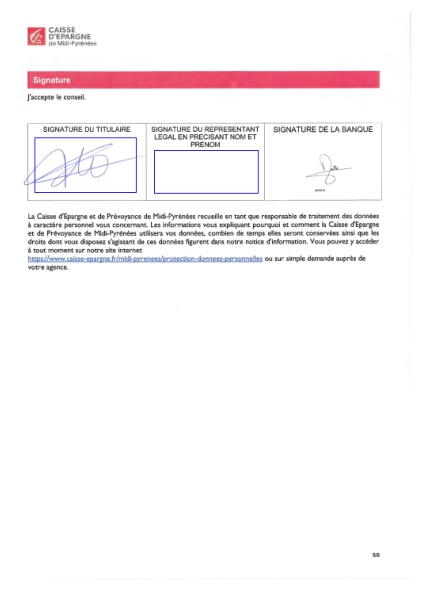

In [11]:
# Demande à l'utilisateur de dessiner les rectangles 
# supposés contenir la signature
# ------------------------------------
box_prop_list,img = tp.create_template(im_template,show_instructions=True, windowHeight=None, windowWidth=None)
print("Template sélectionné :")
pp.show_image(img)

>>> Fonction find_all_keyWord_coord() <<<

----- Texte trouvé : -----
['', '', '', '', 'CAISSE', '', 'D’EPARGNE', '', '(=', '|', 'de', 'Midi-Pyrénées', '', '', '', ' ', '', '', '', 'Signature', '', '', '', 'Jaccepte', 'le', 'conseil.', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', 'SIGNATURE', 'DU', 'TITULAIRE', 'SIGNATURE', 'DU', 'REPRESENTANT', '|', 'SIGNATURE', 'DE', 'LA', 'BANQUE', '', 'LEGAL', 'EN', 'PRECISANT', 'NOM', 'ET', '', 'PRENOM', '', '', '', '_', '4610218', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', 'La', 'Caisse', "d'Epargne", 'et', 'de', 'Prévoyance', 'de', 'Midi-Pyrénées', 'recueille', 'en', 'tant', 'que', 'responsable', 'de', 'traitement', 'des', 'données', '', 'A', 'caractére', 'personnel', 'vous', 'concernant.', 'Les', 'informations', 'vous', 'expliquant', 'pourquoi', 'et', 'comment', 'la', 'Caisse', "d'Epargne", '', 'et', 'de', 'Prévoyance', 'de', 'Midi-Pyrénées', 'utilisera', 'vos', 'données,',

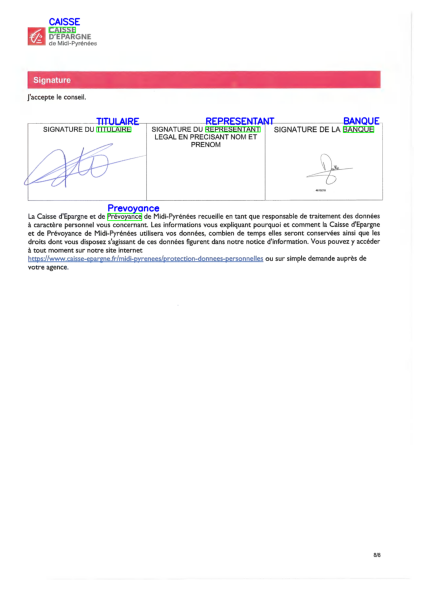

In [12]:
# Calcul des coordonnées des mots clés sur
# la page contenant la signature
# ------------------------------------
keyWords_template = ['TITULAIRE','REPRESENTANT','BANQUE','CAISSE', 'Prévoyance'] #LEA
#keyWords_template = ['Signature', 'Nom', 'Prenom', 'Fait à', 'DONNEES A CARACTERE PERSONNEL','DECLARATION DU CLIENT'] #EAI
#keyWords_template = ["Signature", "exemplaire", "FERNIQUE"] #BS

key_points_dict = tp.find_all_keyWord_coord(im=im_template, keyWords_template=keyWords_template, debug=True)

In [13]:
# Calcul des coordonnées de ces rectangles par rapport
# à la position des mots clés keyWords_template
# ------------------------------------
list_relative_points = tp.compute_relative_coord(box_prop_list=box_prop_list,key_points_dict=key_points_dict)

Fonction main :\
*-- regroupe toutes les fonctions du module template.py --*

In [ ]:
# Fonction main : exécute toutes les étapes ci-dessus en une seule fonction
# ------------------------------------
list_relative_points, template_shape, template_text = tp.main_template(
      path_template="C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/Python/data/LEA/papier",
      name_template="006961477.pdf",
      page_template=-1, 
      path_save_result = "C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/Python/utilities",
      keyWords_template=['SIGNATURE DU TITULAIRE','REPRESENTANT','BANQUE','CAISSE', 'Prévoyance'],
      debug=False,
      show_instructions=True,
      windowHeight=None, 
      windowWidth=None)

## Module detectSignature

In [ ]:
#help(ds)

In [14]:
# Chargement du pdf à analyser
# ------------------------------------
pdf = pp.load_pdf(pdf_name="007308023.pdf",pdf_path=PATH_DATA) #LEA

#pdf = pp.load_pdf(pdf_name="007335832.pdf",pdf_path=PATH + "/data/EAI/papier") #EAI

>>> Fonction find_page_with_Tesseract() <<<

Image d'origine :


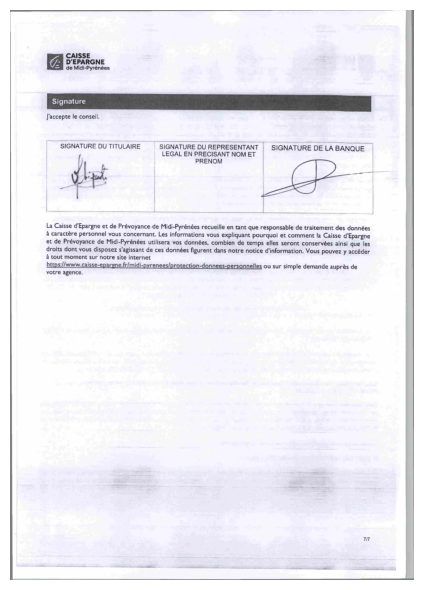

Image après rotation openCV :
angle openCV : 0.02866221847606629


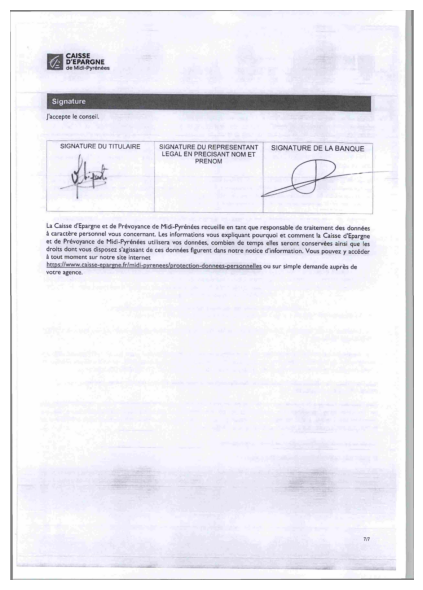

Image après pre-processing :


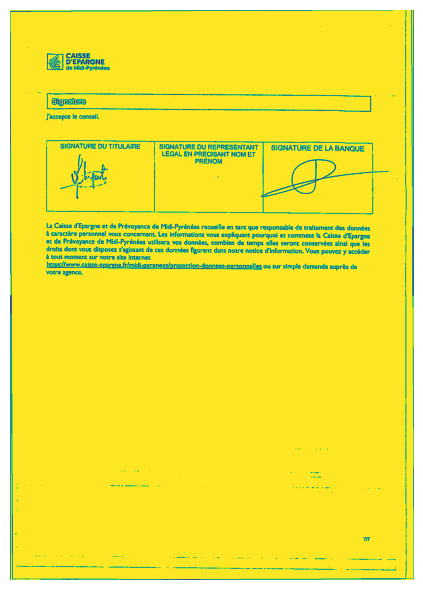

Similarity : 0.8117647058823529


In [15]:
# Extraction de la page contenant la signature
# ------------------------------------
im, image_info, warning = ds.find_page_with_Tesseract(pdf=pdf,
                                                      template_text=template_text,
                                                      similarity_thresh=0.5,
                                                      template_shape=template_shape,
                                                      start_with="end",
                                                      verbose=True)

print("warning : ", warning)

>>> Fonction find_1_keyWord_coord() <<<

----- Texte trouvé avec un niveau de confiance >= 80 : -----
['  (conf:95)', '  (conf:95)', '  (conf:95)', '  (conf:95)', '  (conf:95)', 'CAISSE (conf:92)', 'de (conf:96)', '   (conf:95)', '   (conf:95)', '  (conf:95)', '  (conf:95)', 'le (conf:93)', 'conseil. (conf:90)', '  (conf:95)', '  (conf:95)', 'SIGNATURE (conf:96)', 'DU (conf:92)', 'TITULAIRE (conf:91)', '  (conf:95)', '  (conf:95)', 'SIGNATURE (conf:96)', 'DU (conf:92)', 'REPRESENTANT (conf:91)', 'LEGAL (conf:96)', 'EN (conf:93)', 'PRECISANT (conf:92)', 'NOM (conf:96)', 'ET (conf:96)', 'PRENOM (conf:92)', '  (conf:95)', 'SIGNATURE (conf:96)', 'DE (conf:94)', 'LA (conf:93)', 'BANQUE (conf:93)', '  (conf:95)', '  (conf:95)', 'La (conf:96)', 'Caisse (conf:96)', 'et (conf:96)', 'de (conf:93)', 'de (conf:96)', 'Midi-Pyrénées (conf:93)', 'recueille (conf:90)', 'en (conf:96)', 'tant (conf:96)', 'que (conf:96)', 'responsable (conf:96)', 'de (conf:96)', 'traitement (conf:96)', 'des (conf:96)', '

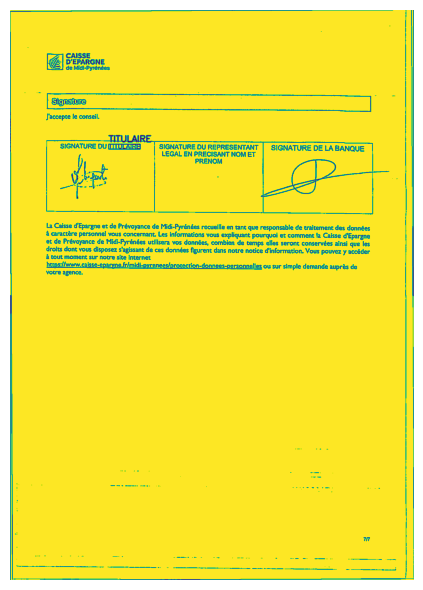

In [16]:
# Recherche la première occurence d'un des mots de la liste 
# keyWords_template sur l'image et renvoie sa position.
# ------------------------------------
key_point, keyWord, warning = ds.find_1_keyWord_coord(im=im, to_find=keyWords_template, 
                                                      image_info=image_info, debug=True)

>>> extract_signature_boxes() <<<

 Zones de l'image extraites :


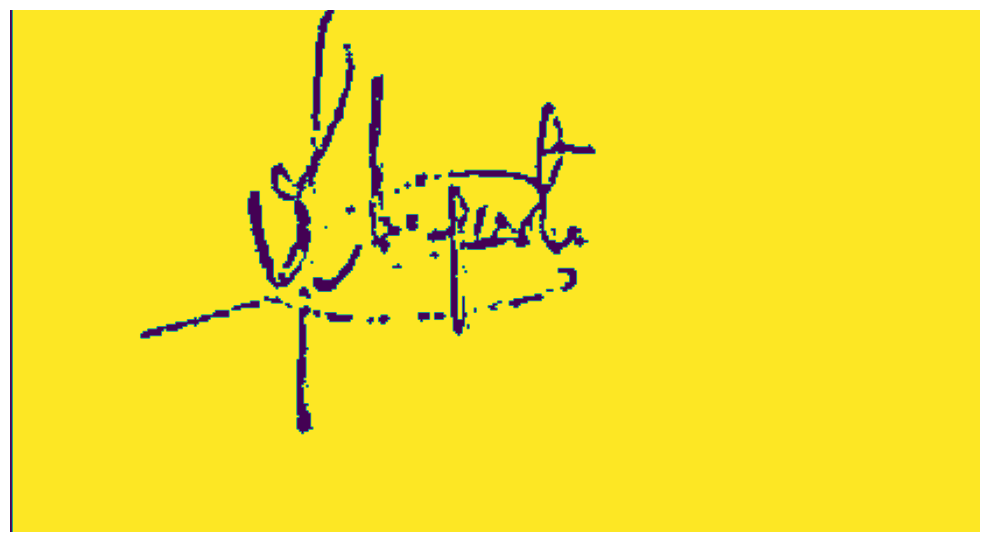

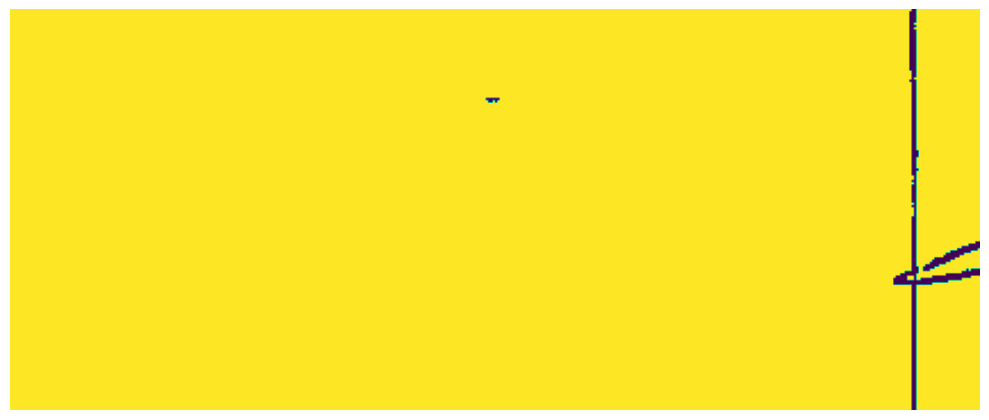

In [17]:
# Renvoi des zones supposées contenir la signature 
# ------------------------------------
list_im_boxes = ds.extract_signature_boxes(im=im, 
                                           key_point=key_point,
                                           keyWord=keyWord,
                                           list_relative_points=list_relative_points,
                                           debug=True)


Test signature de la zone 1
------------------------------------
>>> verify_signature() <<<

Cropper
min_region_size = 100.0
border_ratio = 0.01

pixel_ratio:  0.17845433255269322
>>> Image après Cropper:


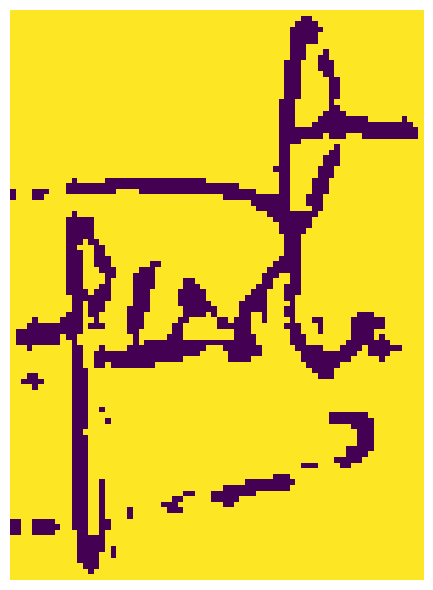


Judger
pixel_ratio = [0.01, 1]

>>> Document signé: True

Test signature de la zone 2
------------------------------------
>>> verify_signature() <<<

Cropper
min_region_size = 100.0
border_ratio = 0.01

pixel_ratio:  0.0736222128733698
>>> Image après Cropper:


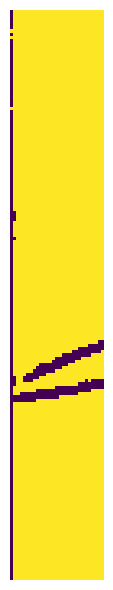


Judger
pixel_ratio = [0.01, 1]

>>> Document signé: True


In [18]:
#  Vérifie si les zones extraites contiennent bien une signature
# ------------------------------------
for i in range(len(list_im_boxes)):
    print("\nTest signature de la zone "+str(i+1))
    print("------------------------------------")
    is_signed,signature = ds.verify_signature(im_bin = list_im_boxes[i],
                                    cropper_params = {"min_region_size":1e2,"border_ratio":0.01},
                                    judger_params = {"pixel_ratio": [0.01,1]},
                                    verbose = True)

Fonction main :\
*-- regroupe toutes les fonctions du module detectSignature.py --*

In [20]:
# Fonction main : exécute toutes les étapes ci-dessus en une seule fonction
# ------------------------------------
# LEA
result = ds.main_detectSignature(
    path_data="C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/Alteryx/Workflow_LEA/input_data",
    keyWords_template=['TITULAIRE','REPRESENTANT','BANQUE','CAISSE', 'Prévoyance'],
    path_save_result=None, #"C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/result",
    path_save_imsig="C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/result/imsig",
    name_pdf= None,#['007333320_sigTit_pap.pdf','007417781_sigRep_pap.pdf','007418530_sigTit_pap.pdf'], #None,
    saved_template=list_relative_points, #None,
    template_shape=template_shape, #None,
    similarity_thresh=0.5,
    template_text=template_text, #None,
    path_saved_template=None, #"C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/Python/utilities",
    start_with="end",
    debug = False,
    cropper_params={"min_region_size":1e2,"border_ratio":0.01},
    judger_params={"pixel_ratio": [0.001,1]})


Debut analyse...
[====================] 100%  file 13135_006683280_SLEA_2022-11-15_0ee0a32f-dfee-446d-9d31-1beb01841b69.pdf
...fin analyse !
Temps d'exécution total: 4 minutes 5.406 secondes


In [ ]:
# BS
result = ds.main_detectSignature(
    path_data="C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/Alteryx/Workflow_BS/input_data",
    keyWords_template=['Signature', 'exemplaire', 'FERNIQUE'],
    path_save_result=None, #"C:\Users\A3193307\Groupe BPCE\CEMP - Data & Décisionnel - Data Science\Analyse Documents\result\python_result_BS.csv",
    path_save_imsig="C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/result/imsig",
    name_pdf= None,
    saved_template=None, #list_relative_points
    template_shape=None, 
    similarity_thresh=0.5,
    template_text=None,
    path_saved_template="C:/Users/A3193307/Groupe BPCE/CEMP - Data & Décisionnel - Data Science/Analyse Documents/Python/utilities",
    debug = False,
    start_with="begin",
    cropper_params={"min_region_size":1e2,"border_ratio":0.01},
    judger_params={"pixel_ratio": [0.001,1]})

## Depuis le terminal

Pour lancer le programme directement depuis le terminal : 

- activation du kernel pdf (environement conda créé pour ce projet :

- on se place dans le bon répertoire : 

### LEA

#### Template

#### Analyse 

### EAI

#### Template type 1

#### Analyse type 1

#### Récupération des pdfs contenant une erreur pour les soumettre à un 2e template

#### Template type 2

#### Analyse type 2

### BSAP

#### Template 

#### Analyse

### QCFQR

#### Template

#### Analyse

## Fin :)

*Autres tests possibles pour l'Analyse du document LEA:*